In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(1473, 2)

In [3]:
df.head()

,Time,domain
0,2021-09-30 15:54:14,localhost:8888
1,2021-09-30 15:53:37,localhost:8888
2,2021-09-30 15:53:29,localhost:8888
3,2021-09-30 15:53:26,localhost:8888
4,2021-09-30 15:52:11,localhost:8888


In [4]:
df.tail()

,Time,domain
1468,2021-07-07 07:37:25,www.primevideo.com
1469,2021-07-06 10:11:13,www.primevideo.com
1470,2021-07-05 23:26:17,datascience.umbc.edu
1471,2021-07-05 23:26:17,professionalprograms.umbc.edu
1472,2021-07-05 23:26:17,professionalprograms.umbc.edu


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
#df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.google.com                        266
docs.google.com                       123
blackboard.umbc.edu                    62
drive.google.com                       58
mail.google.com                        58
github.com                             57
localhost:8888                         56
stackoverflow.com                      53
colab.research.google.com              41
accounts.google.com                    21
www.youtube.com                        21
www.xfinity.com                        20
towardsdatascience.com                 15
calendar.google.com                    15
webauth.umbc.edu                       14
www.parallels.com                      14
matplotlib.org                         14
connect.secure.wellsfargo.com          13
www.bitcraze.io                        13
livebook.manning.com                   11
pandas.pydata.org                      11
medium.com                              9
umbc-my.sharepoint.com                  9
localhost:8889                    

In [10]:
sum(df['domain'].value_counts())

1462

<AxesSubplot:>

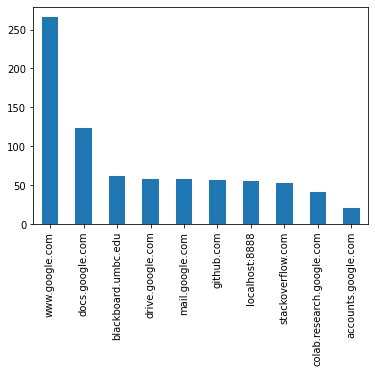

In [11]:
# top 10 sites that I visisted
#df['domain'].value_counts()[:10].plot(kind='bar')
df['domain'].value_counts()[:10].plot(kind='bar')

In [12]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0       4
1       8
2       2
3       4
4       1
5       3
6      13
7       8
8      29
9      31
10    212
11     91
12     25
13     20
14    223
15    114
16    179
17     75
18    172
19     45
20    101
21     75
22     15
23     23
Name: domain, dtype: int64

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-09-30 15:54:14,localhost:8888,Thursday,3
1,2021-09-30 15:53:37,localhost:8888,Thursday,3
2,2021-09-30 15:53:29,localhost:8888,Thursday,3
3,2021-09-30 15:53:26,localhost:8888,Thursday,3
4,2021-09-30 15:52:11,localhost:8888,Thursday,3


In [14]:
df['Day'].value_counts()

Wednesday    472
Friday       404
Monday       193
Tuesday      159
Thursday     102
Sunday        99
Saturday      44
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    193
1    159
2    472
3    102
4    404
5     44
6     99
Name: DayIndex, dtype: int64

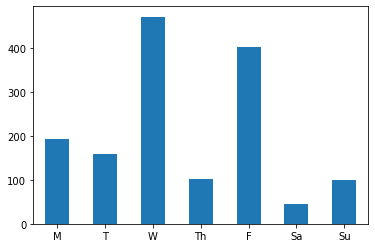

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
#most used domains on wednesdays
list = df.loc[df['Day'] == 'Wednesday', 'domain']
#list.value_counts()[:10]

<AxesSubplot:>

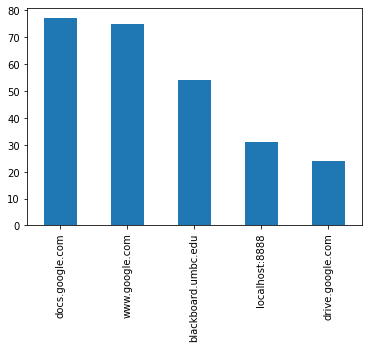

In [18]:
list = list.value_counts()[0:5]
list.plot.bar()

In [19]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-09-30 15:54:14,localhost:8888,Thursday,3,False
1,2021-09-30 15:53:37,localhost:8888,Thursday,3,False
2,2021-09-30 15:53:29,localhost:8888,Thursday,3,False
3,2021-09-30 15:53:26,localhost:8888,Thursday,3,False
4,2021-09-30 15:52:11,localhost:8888,Thursday,3,False


In [20]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [21]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
299,2021-09-26 16:30:48,www.google.com,Sunday,6,True
300,2021-09-26 15:39:20,mail.google.com,Sunday,6,True
301,2021-09-26 15:25:02,mail.google.com,Sunday,6,True
302,2021-09-26 15:24:51,mail.google.com,Sunday,6,True
303,2021-09-26 15:18:58,drive.google.com,Sunday,6,True


In [22]:
weekday['domain'].value_counts()[:5]

www.google.com         248
docs.google.com        120
blackboard.umbc.edu     62
localhost:8888          56
stackoverflow.com       52
Name: domain, dtype: int64

In [23]:
weekend['domain'].value_counts()[:5]

mail.google.com              24
www.google.com               18
drive.google.com             16
colab.research.google.com    15
github.com                   11
Name: domain, dtype: int64

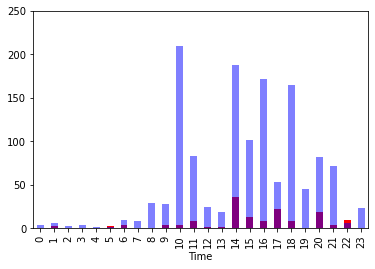

In [24]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 250])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [25]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

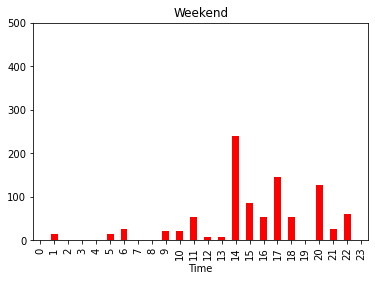

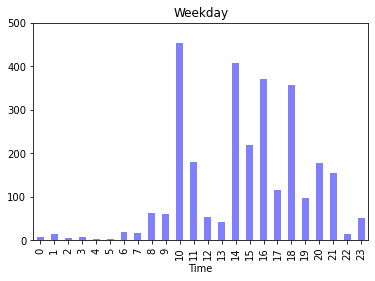

In [26]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 500]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [27]:
df['domain'].value_counts()[:50]

www.google.com                        266
docs.google.com                       123
blackboard.umbc.edu                    62
drive.google.com                       58
mail.google.com                        58
github.com                             57
localhost:8888                         56
stackoverflow.com                      53
colab.research.google.com              41
accounts.google.com                    21
www.youtube.com                        21
www.xfinity.com                        20
towardsdatascience.com                 15
calendar.google.com                    15
webauth.umbc.edu                       14
www.parallels.com                      14
matplotlib.org                         14
connect.secure.wellsfargo.com          13
www.bitcraze.io                        13
livebook.manning.com                   11
pandas.pydata.org                      11
medium.com                              9
umbc-my.sharepoint.com                  9
localhost:8889                    

In [28]:
df['domain'] = df['domain'].astype(str)

In [29]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

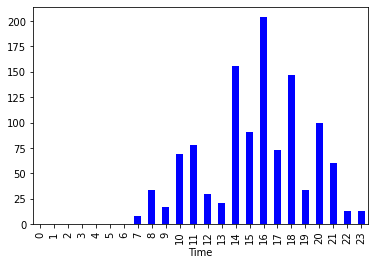

In [30]:
_= show_domain_stats('www.google.com', 'blue')

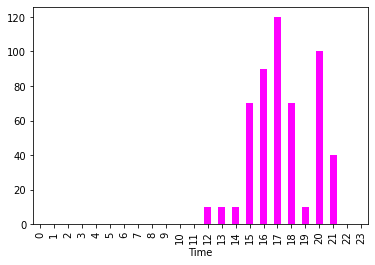

In [31]:
_ = show_domain_stats('stackover', 'magenta')


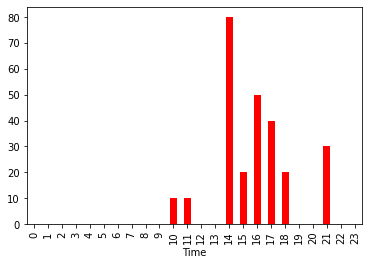

In [32]:
_ = show_domain_stats('youtube', 'red')


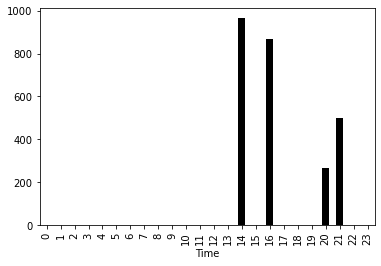

In [33]:
_=show_domain_stats('blackboard', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

1. This looks like a student's computer based on blackboard domain, could be personal computer.
2. Mostly not because he/she is a student.
3. From this data it seems that his/her interests are  limited to learning.
4. Google is being used a lot - as a serch engine , for mail, drive, docs and google colabs.


### What do you think about this assignment? ( 3 sentences at most! ) 

I feel this is a great assignment because it gives insights into users activities. It could be used to analyse employees activities, for advertisements etc. 

__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)